<p style="font-size:35px;">Part 1 - Dimensionality reduction

<p style="font-size:28px;"><b><u>PCA:

<p style="font-size:25px;"><b><u>theoretical section:

<p style="font-size:22px;"><b>summary:

Principal Component Analysis (PCA) is an unsupervised algorithm used to create linear combinations of the original features. These new features, known as principal components, are orthogonal, ensuring they are uncorrelated.

The primary objective of PCA is to simplify the complexity inherent in high-dimensional data while preserving underlying trends and patterns. This simplification is achieved by transforming the data into a new coordinate system where the first principal component captures the maximum variance observed in the data, the second component captures the second most variance, and so forth.

PCA can be conceptualized as the solution to two seemingly distinct optimization problems:

Finding an orthogonal matrix that minimizes the sum of reconstruction errors across all data elements.
Identifying the matrix on the Stiefel manifold that maximizes the sum of unnormalized variances in each direction, which serves as the compression matrix for the original data.
In essence, PCA provides a way to reduce the dimensionality of data while retaining its essential variance and structure, facilitating easier interpretation and analysis of complex datasets

<p style="font-size:22px;"><b>underlying assumptions:

**normolized:** the data must be normalized because PCA uses variance and covariance, which are more informative for normally distributed data. The transformation is dependent on scale. If the data is not normalized, the features that are on the largest scale would dominate our new principal components.


**Linearity:** PCA assumes that the relationships between variables are linear. It seeks to find a linear combination of variables that maximizes variance. Non-linear relationships are not captured well by PCA.<br>

**Varinace importance:** PCA assumes that components (directions in the data) with the largest variances are the most informative and contain the most significant structure of the data.<br>


**Orthogonality of Principal Components:** PCA assumes that the principal components are orthogonal (uncorrelated) to each other. Each principal component represents a direction of maximum variance that is orthogonal to the preceding components.<br>

<p style="font-size:22px;"><b>according to the underlying assumptions PCA is expected to succeed when:


**Linear Relationships:** The relationships between variables are linear. It seeks to find a linear combination of variables that maximizes variance.<br>



**High Dimensionality with Redundancy:** When you have a large number of features (dimensions) but many of them are correlated or redundant, PCA can reduce the dimensionality by combining correlated features into principal components.<br>

**Gaussian (Normal) Distributions:** When the data is a multivariate normal distribution because variance and covariance are more meaningful in such data distributions.

<p style="font-size:22px;"><b>PCA is weeker in cases where:

__Non-Linear Relationships:__ When the data lies on a non-linear manifold<br>


**Non-Gaussian Distributions:** When the data has heavy tails, skewness, or outliers, and in general a non guesian data. Such data distributions can lead to misleading principal components.<br>



**Heteroscedasticity:** When the variances are not homogeneous across the dataset (i.e., some parts of the data have much higher variance than others)

<p style="font-size:25px;"><b><u>coding section:

In [17]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

In [26]:
def plot_and_return_good_data_pca():
    np.random.seed(42)
    mean = [0, 0, 0]
    cov = [[1, 0.95, 0.95], [0.95, 1, 0.95], [0.95, 0.95, 1]]  # Very strong linear correlation
    data_good = np.random.multivariate_normal(mean, cov, 100)
    
    # Normalizing the data
    data_good = (data_good - np.mean(data_good, axis=0)) / np.std(data_good, axis=0)

    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=UserWarning, module="IPython.core.pylabtools")
        
        # Plotting the dataset
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(data_good[:, 0], data_good[:, 1], data_good[:, 2])
        ax.set_title('Dataset Well-Suited for PCA')
        plt.show()
        
    return data_good

def plot_and_return_bad_data_pca():
    np.random.seed(42)
    theta = np.linspace(0, 4 * np.pi, 100)
    z = np.linspace(-1, 1, 100)
    r = z**2 + 1
    x = r * np.sin(theta)
    y = r * np.cos(theta)
    data_bad = np.vstack((x, y, z)).T

    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=UserWarning, module="IPython.core.pylabtools")
        
        # Plotting the dataset
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(data_bad[:, 0], data_bad[:, 1], data_bad[:, 2])
        ax.set_title('Dataset Not Well-Suited for PCA')
        plt.show()
        
    return data_bad


def perform_pca_and_plot(data, data_name):
    # Perform PCA
    pca = PCA(n_components=2)
    transformed_data = pca.fit_transform(data)
    
    # Explained variance ratio
    explained_variance = pca.explained_variance_ratio_
    print(f"Explained variance ratios for {data_name}: {explained_variance}")
    
    # Suppress specific Matplotlib warnings
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=UserWarning, module="IPython.core.pylabtools")

        # Plot the original data
        fig = plt.figure(figsize=(12, 6))
        
        ax = fig.add_subplot(121, projection='3d')
        ax.scatter(data[:, 0], data[:, 1], data[:, 2])
        ax.set_title(f'Original {data_name} Data')
        
        # Plot the PCA transformed data
        ax2 = fig.add_subplot(122)
        ax2.scatter(transformed_data[:, 0], transformed_data[:, 1])
        ax2.set_title(f'PCA of {data_name} Data')
        ax2.set_xlabel('Principal Component 1')
        ax2.set_ylabel('Principal Component 2')
        
        plt.show()

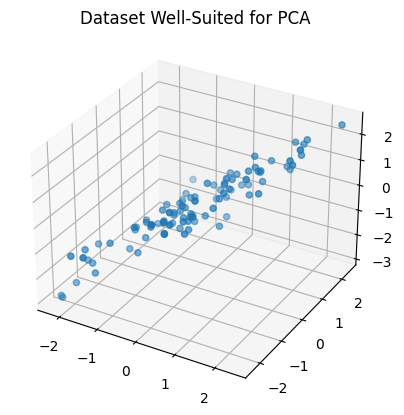

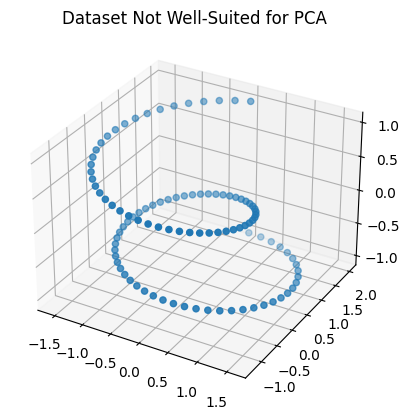

In [27]:
good_data = plot_and_return_good_data_pca()
bad_data = plot_and_return_bad_data_pca()

Explained variance ratios for good: [0.94781305 0.0303209 ]


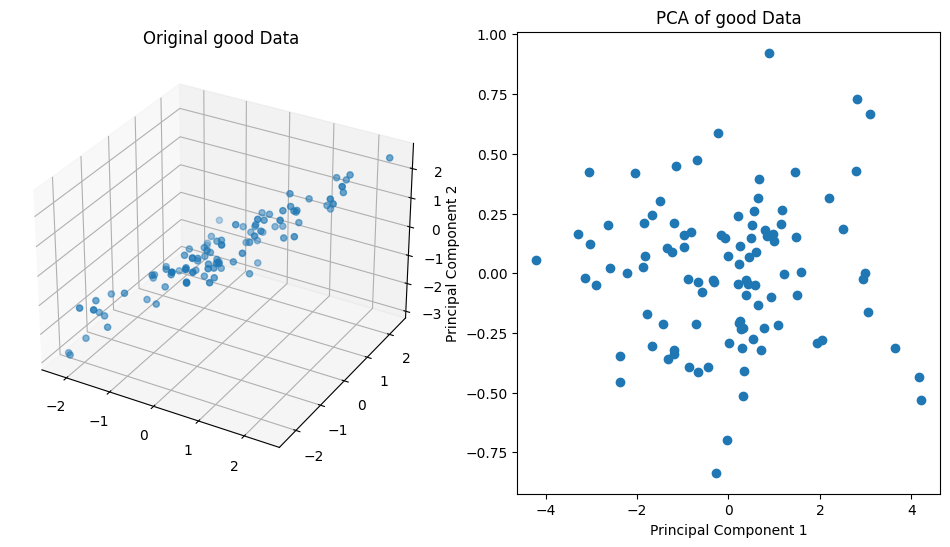

Explained variance ratios for bad: [0.46017654 0.44253703]


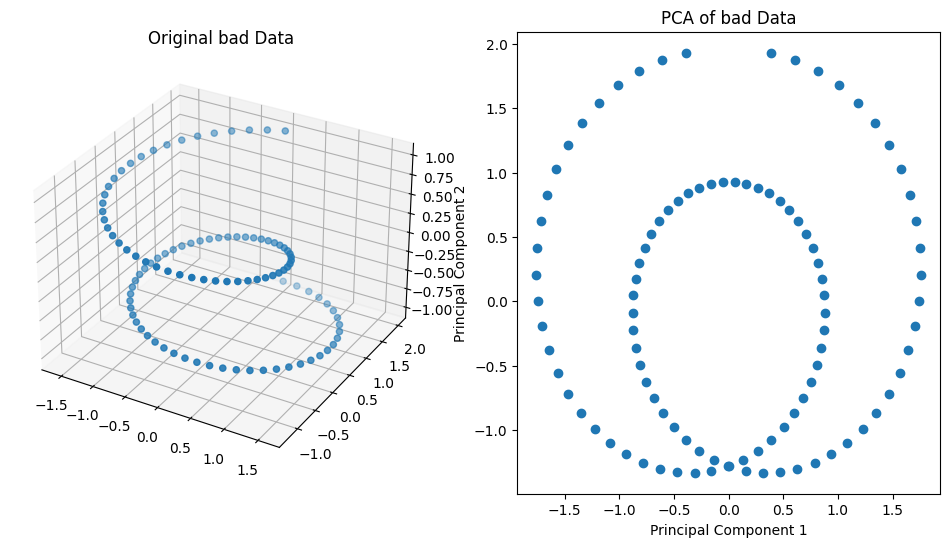

In [28]:
perform_pca_and_plot(good_data, 'good')
perform_pca_and_plot(bad_data, 'bad')

<p style="font-size:22px;"><b>Discussion

To generate datasets demonstrating distinct characteristics, we applied the principles outlined in the theoretical framework. The good dataset exhibits a strong linear correlation among its variables, accompanied by normalization to a mean of 0 and standard deviation of 1. In contrast, the bad dataset features a non-linear structure, specifically manifesting as a spiral pattern that cannot be adequately represented by linear combinations of its variables.

Upon analysis, the variance ratios of the principal components illustrate the differentiation between the datasets. For the good dataset, the variance ratios are [0.94781305, 0.0303209], indicating a dominant contribution from the first principal component. Conversely, the bad dataset displays variance ratios of [0.46017654, 0.44253703], suggesting a more evenly distributed variance across the principal components.

Furthermore, visual inspection of the datasets reveals notable distinctions. The good dataset maintains its original spread and shape after transformation, consistent with the theoretical expectation of well-correlated variables and effective normalization. In contrast, the bad dataset exhibits a notably altered shape, indicative of the challenges posed by its non-linear structure to conventional linear representations.

These observations align closely with the theoretical principles discussed, illustrating the practical implications of dataset characteristics on dimensionality reduction and data representation methodologies.

<p style="font-size:28px;"><b><u>LDA:

<p style="font-size:22px;"><b>summery:

Linear Discriminant Analysis (LDA) is a supervised machine learning technique primarily employed for feature extraction and classification tasks. Its objective is to determine linear combinations of features that effectively differentiate between distinct classes within a dataset. LDA aims to maximize the separation between the means of different classes while minimizing the dispersion (variance) of data points within each class.

The process of LDA can be summarized as follows:

**Calculate Class Mean Vectors**: Compute the mean vector for each class present in the dataset.

**Compute Scatter Matrices**: Calculate two types of scatter matrices:

**Within-Class Scatter Matrix (Sw)**: Measures the spread of data points within each class.<br>
**Between-Class Scatter Matrix (Sb)**: Measures the scatter among the mean vectors of different classes.<br>
**Solve Generalized Eigenvalue Problem**: LDA involves solving a generalized eigenvalue problem, where the objective is to find the linear transformations (represented by eigenvectors) that maximize the ratio of between-class scatter to within-class scatter. This is akin to PCA but formulated using the ratio of these scatter matrices (Sb and Sw).<br>

In essence, LDA seeks to project the data into a lower-dimensional space where the separation between different classes is maximized. By emphasizing the differences between classes while minimizing the variability within each class, LDA enhances the discriminative power of the transformed features for subsequent classification tasks.







<p style="font-size:22px;"><b>underlying assumptions:

**Normality**:LDA assumes that the features within each class are normally distributed. This implies that the data within each class follows a Gaussian distribution.

**Homogeneity of Variance (Homoscedasticity)**:LDA assumes that the covariance matrices of the features are the same for all classes. This means that the spread (variance) of the features is identical across all classes.

**Independence**:The observations are assumed to be independent of each other. This means that the value of one observation does not affect the value of another.

**Linearity**:LDA assumes that the relationships between the features are linear. This means that the separation between classes can be achieved through linear combinations of the features.

<p style="font-size:22px;"><b>according to the underlying assumptions LDA is expected to succeed when:


**Linearity**:The relationships between the features are linear, meaning that classes can be separated using linear combinations of the features.

**Normality**: The features within each class are normally distributed (i.e., each class follows a Gaussian distribution).

**Homogeneity of Variance (Homoscedasticity**): The covariance matrices of the features are the same for all classes, meaning the variance within each class is similar.

**Independence**: The observations are independent of each other, meaning the value of one observation does not influence another.

**labeled data**: From the characteristic of the algorithm we assume that the data is labeled otherwise the algoritehm can't decide what seperation to max.

<p style="font-size:22px;"><b>LDA is weeker in cases where:

**Non-Gaussian Distributions**: LDA assumes that the features of each class are normally distributed. If the actual data distribution deviates significantly from normality, LDA's performance can degrade.

**Equal Covariance Matrices**: LDA assumes that the covariance matrices of the different classes are equal. When the covariance structures are significantly different, this assumption is violated, leading to poor classification performance.

**Non-linear Boundaries**: LDA creates linear decision boundaries between classes. If the true boundaries between classes are non-linear, LDA will not be able to capture the complex relationships, resulting in poor classification accuracy. 

**Outliers**: LDA is sensitive to outliers because it relies on the mean and variance of the data. Outliers can skew these statistics, leading to incorrect classification boundaries. 

<p style="font-size:25px;"><b><u>coding section:

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [87]:
def plot_and_return_good_data_lda():
    # Generate data for the "good" dataset
    np.random.seed(42)
    mean1 = [0, 0, 0]
    mean2 = [6, 6, 6]
    mean3 = [12, 12, 12]
    cov = np.eye(3)  # Identity covariance matrix
    
    data1 = np.random.multivariate_normal(mean1, cov, 100)
    data2 = np.random.multivariate_normal(mean2, cov, 100)
    data3 = np.random.multivariate_normal(mean3, cov, 100)

    # Combine data1, data2, and data3 into one dataset with labels
    data_combined = np.concatenate((data1, data2, data3))
    labels = np.concatenate((np.zeros(data1.shape[0]), np.ones(data2.shape[0]), 2*np.ones(data3.shape[0])))

    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=UserWarning, module="IPython.core.pylabtools")
        # Plot the combined dataset
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(data_combined[:,0], data_combined[:,1], data_combined[:,2], c=labels, cmap='tab10')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title('Dataset good for LDA')
        plt.show()
    return data_combined, labels

def plot_and_return_bad_data_lda():
    # Generate data for the "bad" dataset
    np.random.seed(0)
    mean1 = [0, 0, 0]
    mean2 = [2, 2, 2]
    mean3 = [-2, -2, -2]
    cov1 = np.array([[1, 0.8, 0.8], [0.8, 1, 0.8], [0.8, 0.8, 1]])  # Unequal covariance matrix
    cov2 = np.array([[1, 0.5, 0.5], [0.5, 1, 0.5], [0.5, 0.5, 1]])  # Unequal covariance matrix
    cov3 = np.eye(3)  # Identity covariance matrix

    data1 = np.random.multivariate_normal(mean1, cov1, 100)
    data2 = np.random.multivariate_normal(mean2, cov2, 100)
    data3 = np.random.multivariate_normal(mean3, cov3, 100)

    # Combine data1, data2, and data3 into one dataset with labels
    data_combined = np.concatenate((data1, data2, data3))
    labels = np.concatenate((np.zeros(data1.shape[0]), np.ones(data2.shape[0]), 2*np.ones(data3.shape[0])))

    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=UserWarning, module="IPython.core.pylabtools")
        # Plot the combined dataset
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(data_combined[:,0], data_combined[:,1], data_combined[:,2], c=labels, cmap='tab10')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title('Dataset Bad for LDA')
        plt.show()
    return data_combined, labels

def compute_separation_score(data, labels):
    # Compute class means
    class_means = np.array([np.mean(data[labels == c], axis=0) for c in np.unique(labels)])

    # Compute within-class scatter matrix
    within_class_scatter = np.zeros((data.shape[1], data.shape[1]))
    for c in np.unique(labels):
        class_data = data[labels == c]
        class_scatter = np.cov(class_data.T)
        within_class_scatter += class_scatter * (class_data.shape[0] - 1)

    # Compute between-class scatter matrix
    between_class_scatter = np.zeros((data.shape[1], data.shape[1]))
    for i, mean_i in enumerate(class_means):
        for j, mean_j in enumerate(class_means):
            if i != j:
                between_class_scatter += np.outer((mean_i - mean_j), (mean_i - mean_j))

    # Compute separation score as the ratio of between-class scatter to within-class scatter
    separation_score = np.trace(between_class_scatter) / np.trace(within_class_scatter)
    
    return separation_score

def perform_lda_and_plot(data, labels, data_name):
    # Create LDA model
    lda = LDA(n_components=2)

    # Fit LDA model to the combined dataset
    lda_combined = lda.fit(data, labels)

    # Transform the combined dataset using LDA
    data_combined_lda = lda_combined.transform(data)

    separation_score = compute_separation_score(data_combined_lda, labels)
    print(f"Separation Score for {data_name} data:", separation_score)

    # Plot the data before and after dimensionality reduction
    fig = plt.figure(figsize=(15, 6))

    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=UserWarning, module="IPython.core.pylabtools")
        # Plot original 3D data
        ax1 = fig.add_subplot(121, projection='3d')
        ax1.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, cmap='tab10')
        ax1.set_title(f'Original {data_name} Data')
        ax1.set_xlabel('X')
        ax1.set_ylabel('Y')
        ax1.set_zlabel('Z')

        # Plot data after LDA (2D)
        ax2 = fig.add_subplot(122)
        ax2.scatter(data_combined_lda[:, 0], data_combined_lda[:, 1], c=labels, cmap='tab10')
        ax2.set_title(f'{data_name} Data After LDA')
        ax2.set_xlabel('LD1')
        ax2.set_ylabel('LD2')

        plt.tight_layout()
        plt.show()



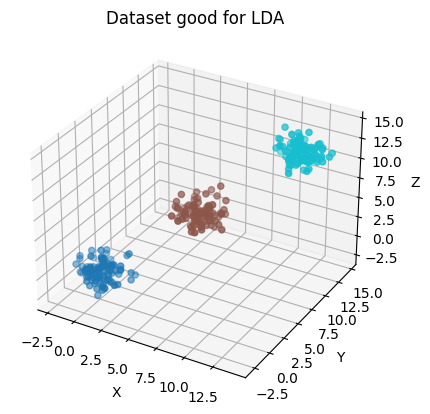

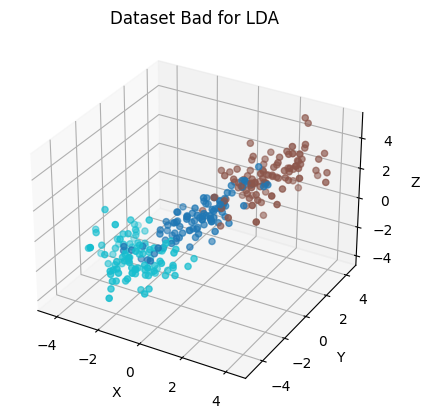

In [68]:
good_data, good_lables = plot_and_return_good_data_lda()
bad_data, bad_labeles = plot_and_return_bad_data_lda()

Separation Score for good data: 2.3467433309563295


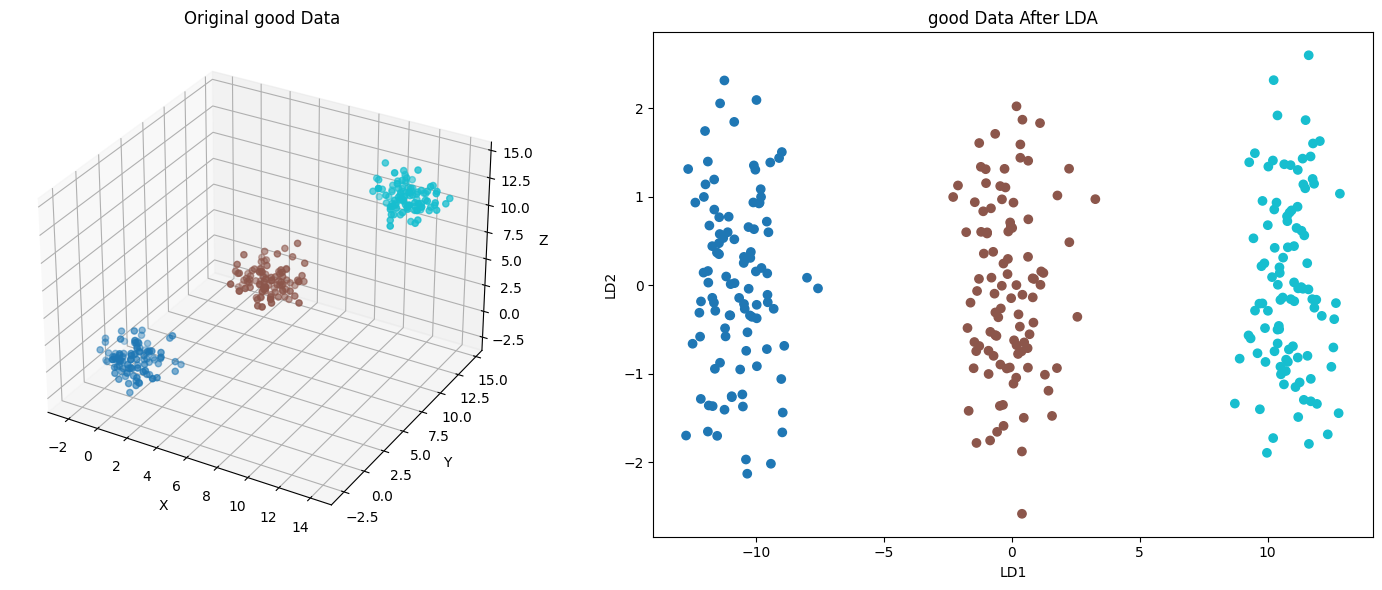

Separation Score for bad data: 0.13991234559756685


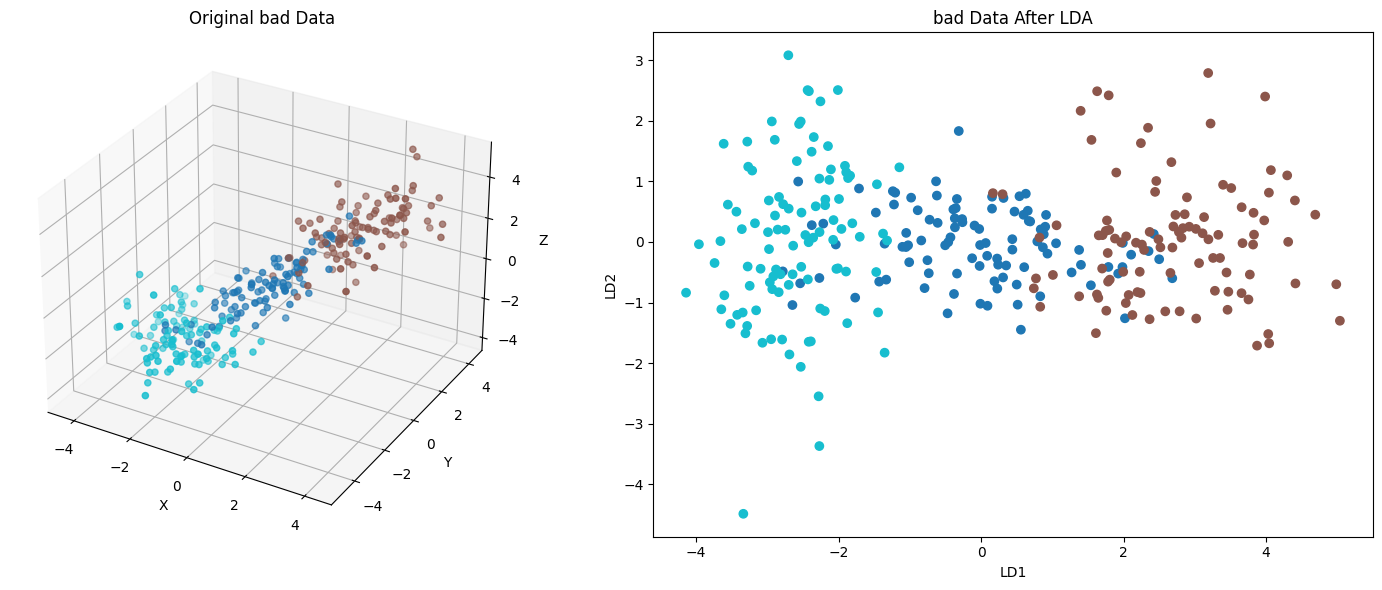

In [88]:
perform_lda_and_plot(good_data, good_lables, 'good')
perform_lda_and_plot(bad_data, bad_labeles, 'bad')

<p style="font-size:22px;"><b>Discussion

To create distinct datasets illustrating different characteristics, we applied the theoretical principles outlined in our study. The good dataset is characterized by well-separated clusters with clearly defined means and spherical covariance matrices, which facilitate effective discrimination between classes. In contrast, the bad dataset features clusters with closer means and unequal covariance matrices, making it challenging to distinguish between classes accurately.

The process involved calculating the scatter matrices to quantify the separation between classes:

Within-Class Scatter Matrix: This matrix was derived by summing the covariance matrices of individual data points within each class.
Between-Class Scatter Matrix: Centroids were computed for each class, and the matrix was formed by summing the differences between these centroids.
To evaluate the effectiveness of class separation, we computed a Separation Score by taking the ratio of the trace (sum of diagonal elements) of the Between-Class Scatter Matrix to that of the Within-Class Scatter Matrix. In our analysis, the good dataset achieved a Separation Score of 2.3467433309563295, indicating clear discrimination between classes. Conversely, the bad dataset scored 0.13991234559756685, illustrating poorer class separation.

Furthermore, post-dimensional reduction analysis revealed that the separation observed in the good dataset persisted visibly, confirming effective class discrimination. In contrast, the bad dataset showed minimal to no discernible separation post-reduction.

These findings align closely with the theoretical expectations discussed earlier, demonstrating the practical implications of dataset characteristics on discriminative performance and dimensionality reduction outcomes.

<p style="font-size:28px;"><b><u>CCA:

<p style="font-size:22px;"><b>summary:

Canonical Correlation Analysis (CCA) is a statistical method used to understand the relationships between two multivariate sets of variables. It identifies and measures the linear correlations between these two sets by finding pairs of canonical variables (one from each set) that are maximally correlated. CCA can be used for dimensionality reduction by projecting the original data onto a lower-dimensional space defined by the canonical variables. This is particularly useful when the two sets of variables have a high-dimensional structure, and you want to find a common lower-dimensional representation that captures the most significant relationships between the two sets.

The steps to executing CCA are as follows:

**Standardize the Variables**: Ensure that the variables within each set are standardized to have zero mean and unit variance.

**Compute Covariance Matrices**: Calculate the covariance matrix for each set of variables (X and Y) and the cross-covariance matrix between X and Y.

**Solve the Eigenvalue and Eigenvector Problem**: Find the eigenvalues and eigenvectors of the generalized eigenvalue problem derived from the covariance matrices. These eigenvalues represent the canonical correlations, while the eigenvectors provide the canonical weights for constructing canonical variables U and V.

**Form Canonical Variables U and V**: Construct linear combinations of the original variables from each set that maximize the correlation between pairs from the two datasets X and Y.

**Select Top Canonical Variables**: Choose the top k pairs of canonical variables based on the highest canonical correlations. These pairs capture the most significant shared variance between the two sets.

**Transform Data**: Project the original variables X and Y onto the space spanned by the selected canonical variables U and V accordingly.

In summary, in terms of dimensionality reduction, CCA projects the original datasets onto a lower-dimensional space defined by the most correlated linear combinations, thereby capturing the most significant relationships between the two sets of variables.

<p style="font-size:22px;"><b>underlying assumptions:

**Linearity**: The relationships between the variables in each set are linear. CCA assumes that the linear combinations of the variables will capture the relationships between the two sets of variables.

**Multivariate Normality**: The sets of variables X and Y are assumed to be drawn from a multivariate normal distribution. This assumption is especially important for making statistical inferences from the results.

**Homogeneity of Variances**: The variances of the variables within each set should be homogeneous. This means that the variables should have similar scales and distributions.

**Absence of Multicollinearity**: Within each set of variables, there should not be perfect multicollinearity. This means that no variable should be an exact linear combination of the other variables within the same set.



**Independence**: The observations (data points) should be independent of each other. This means that the data should be collected in a way that one observation does not influence another.

<p style="font-size:22px;"><b>according to the underlying assumptions CCA is expected to succeed when:


**Linear Relationships**: The relationships between the variables in each set and between the sets themselves are linear. CCA works best when the true underlying relationships can be captured by linear combinations of the original variables.

**Multivariate Normality**: The variables in each set are approximately normally distributed, which ensures the validity of the statistical inferences made from the analysis.



**Homogeneous Variances**: The variables within each set have similar variances, meaning they are on a comparable scale and have similar distributions.

**Low Multicollinearity**: There is no perfect multicollinearity within each set of variables, ensuring that no variable is an exact linear combination of other variables in the same set.

**Independent Observations**: The observations (data points) are independent of each other, ensuring that the data collection method does not introduce biases that could affect the results.

<p style="font-size:22px;"><b>CCA is weeker in cases where:

**Non-Linear Relationships**: CCA is based on linear combinations of variables. If the relationships between the variables are non-linear, CCA may not capture the true underlying patterns effectively.

**Violation of Multivariate Normality**: If the data sets do not follow a multivariate normal distribution, the results of CCA can be less reliable, and the statistical inferences may not be valid.

**High Multicollinearity**: If there is significant multicollinearity within each set of variables, it can lead to unstable estimates of the canonical coefficients, making it difficult to interpret the results.

**Heterogeneity of Variances**: If the variances of the variables within each set are not homogeneous, it can affect the performance of CCA. The method assumes that the variables are on a comparable scale.

**Dependence Among Observations**: If the observations are not independent (e.g., in time-series data or clustered data), the assumptions of CCA are violated, and the results may be biased.

**Outliers and Noise**: CCA is sensitive to outliers and noise in the data. Outliers can disproportionately influence the canonical correlations and the resulting canonical variables, leading to misleading conclusions.

<p style="font-size:25px;"><b><u>coding section:

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import CCA
import warnings
from scipy.spatial.transform import Rotation as R

In [73]:
def plot_and_return_good_data_cca():
    # Seed for reproducibility
    np.random.seed(42)
    
    # Generate X from a multivariate normal distribution
    X = np.random.multivariate_normal([0, 0, 0], np.eye(3), 200)
    
    # Generate a random orthogonal matrix
    Q, _ = np.linalg.qr(np.random.randn(3, 3))
    
    # Project X onto the orthogonal basis to get Y
    Y = X.dot(Q)
    
    # Combine X and Y into one dataset
    data_combined = np.concatenate((X, Y), axis=1)
    
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=UserWarning, module="IPython.core.pylabtools")
        # Plot the combined dataset
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(data_combined[:, 0], data_combined[:, 1], data_combined[:, 2], c='r', marker='o')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        ax.set_title('Good Data for CCA')
        plt.show()
    
    return data_combined, X, Y

def plot_and_return_bad_data_cca():
    # Step 1: Generate two 3D datasets that are uncorrelated
    np.random.seed(42)  # For reproducibility
    n_samples = 150  # Number of samples

    # Generate random data for X and Y
    X = np.random.rand(n_samples, 3)
    np.random.seed(1)
    Y = np.random.rand(n_samples, 3)
    
    
    # Combine X and Y into one dataset
    data_combined = np.concatenate((X, Y), axis=1)
    
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=UserWarning, module="IPython.core.pylabtools")
        
        # Plot the combined dataset
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(data_combined[:, 0], data_combined[:, 1], data_combined[:, 2], c='r', marker='o')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('X3')
        ax.set_title('Bad Data for CCA with Zero Correlation')
        plt.show()
    
    return data_combined, X, Y




def performe_cca_and_plot(data, X, Y, data_name):
    # Create CCA model
    cca = CCA(n_components=2)

    # Fit CCA model to the good data
    cca.fit(X, Y)



    # canonical_correlation = cca.score(X, Y)

    # Transform the good and bad data using CCA
    X_transformed, Y_transformed = cca.transform(X, Y)
    print(X_transformed.shape)
    print(Y_transformed.shape)
    
    data = np.concatenate((X_transformed, Y_transformed), axis=1).T
    print(np.cov(data))

    # print(f'The canonical correlation coefficients for the {data_name} is:{canonical_correlation}')

    # Suppress specific Matplotlib warnings
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=UserWarning, module="IPython.core.pylabtools")

        # Plot the original data
        fig = plt.figure(figsize=(12, 6))
        
        ax = fig.add_subplot(121, projection='3d')
        ax.scatter(data[:, 0], data[:, 1], data[:, 2])
        ax.set_title(f'Original {data_name} Data')
        
        ax1 = fig.add_subplot(121)
        ax1.scatter(X_transformed, Y_transformed, c='b', label=f'{data_name} Data')
        ax1.set_title(f'{data_name} Data After CCA')
        ax1.set_xlabel('CCA Component 1')
        ax1.set_ylabel('CCA Component 2')
        ax1.legend()

        
        plt.show()

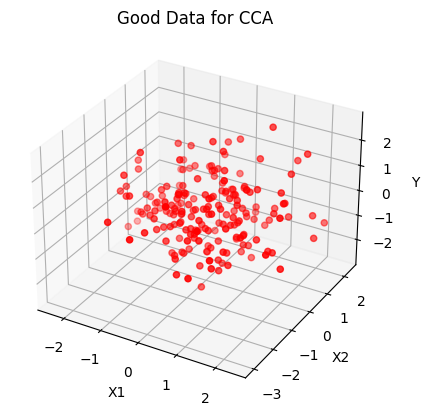

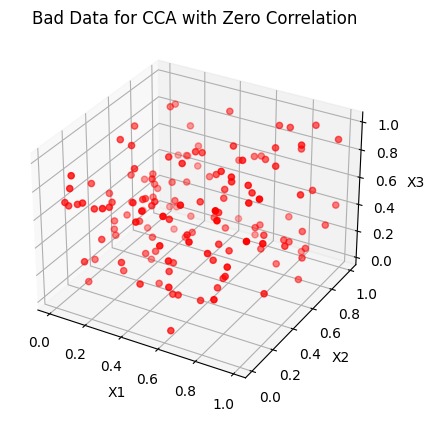

In [57]:
good_data, good_X, good_Y = plot_and_return_good_data_cca()
bad_data, bad_X, bad_Y = plot_and_return_bad_data_cca()

(200, 2)
(200, 2)
[[ 1.02431141e+00  1.09348599e-16  1.01208271e+00  3.65983067e-16]
 [ 1.09348599e-16  9.81728332e-01 -2.05307574e-16  9.66351496e-01]
 [ 1.01208271e+00 -2.05307574e-16  1.00000000e+00  6.91797262e-17]
 [ 3.65983067e-16  9.66351496e-01  6.91797262e-17  9.51215507e-01]]


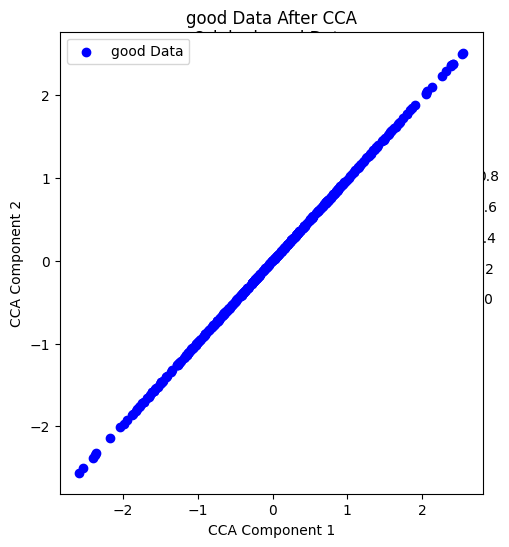

(150, 2)
(150, 2)
[[ 9.46836072e-01 -1.55729270e-16  1.91431230e-01 -5.96092899e-17]
 [-1.55729270e-16  9.31838136e-01 -8.59176158e-06  6.13734861e-02]
 [ 1.91431230e-01 -8.59176158e-06  1.07866925e+00 -1.31140438e-16]
 [-5.96092899e-17  6.13734861e-02 -1.31140438e-16  1.00275278e+00]]


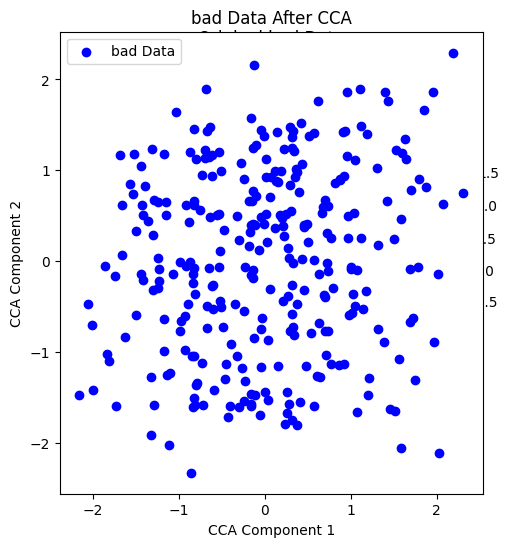

In [74]:
performe_cca_and_plot(good_data, good_X, good_Y, 'good')
performe_cca_and_plot(bad_data, bad_X, bad_Y, 'bad')

<p style="font-size:22px;"><b>Discussion

To generate both good and bad datasets, we applied the principles outlined in the theoretical section. The good dataset was formed by generating data from a normal distribution and subsequently projecting it, ensuring complete correlation between two distinct groups within the dataset. Conversely, the bad dataset was created by independently generating two groups of data from separate normal distributions with different random seeds, thereby introducing uncorrelated variables with differing variances between the groups.

Upon applying dimensionality reduction, the good dataset exhibits strong correlations between the projected features, contrasting sharply with the bad dataset where the reduced dimensions appear randomly distributed, deviating from the objectives of Canonical Correlation Analysis (CCA). These outcomes align directly with the theoretical framework discussed earlier.

<p style="font-size:28px;"><b><u>ICA:

<p style="font-size:22px;"><b>summery:

Independent Component Analysis (ICA) is a statistical method used for separating a multivariate signal into additive, independent components. It assumes that the observed data is generated by a linear mixture of independent source signals. The key steps involved in ICA include preprocessing the data, estimating the mixing matrix and independent sources through optimization algorithms, maximizing the statistical independence between components, and selecting relevant components based on their contribution to the data.<br>
One good problem that describes the practical use for ICA is the **coctail party problem** that show a situation were all of the vectors are a linear combination of some satisticly independet vectors<br>
The steps of ICA are:<br>
**Preprocessing**: Mean-center the data and normalize if necessary.<br>
**Modeling the Mixing Process**: Assume linear combination of independent sources X =AS.<br>
**Estimating the Mixing Matrix**: Optimize a criterion (e.g., maximizing negentropy or kurtosis) to estimate A from X.<br>
**Decomposition**: Recover independent sources S using S = A(−1) * X or other techniques.<br>
**Statistical Independence**: Assess and adjust components iteratively to maximize independence<br>
**Component Selection**: Select relevant components based on contribution to data or interpretability.<br>
**Reconstruction**: Reconstruct the data using the selected independent components.<br>
In general the ICA can be defiend as the solution for two problems, **Maximaize independance of the new feature space** or **Minimize the mutal information of the new feature space**

<p style="font-size:22px;"><b>underlying assumptions:

**Statistical Independence**: ICA assumes that the observed data is generated by a linear mixture of independent source signals. This means that the components of the observed data are statistically independent from each other.

**Non-Gaussianity**: ICA assumes that the independent sources have non-Gaussian distributions. This assumption is important because Gaussian distributions do not capture the kind of structure ICA is designed to extract. Non-Gaussianity enables ICA to identify the statistically independent components.

**Linearity**: ICA assumes that the mixing process, which combines the independent sources to form the observed data, is linear. While this is a simplifying assumption, it is often reasonable in many real-world scenarios.

**Full-Rank Mixing Matrix**.: ICA assumes that the mixing matrix (the matrix that describes how the sources are combined) is full-rank, meaning it has full column rank. This assumption ensures the identifiability of the independent components.

<p style="font-size:22px;"><b>according to the underlying assumptions ICA is expected to succeed when:


**Statistical Independence of Sources**: When the sources in the data are statistically independent, meaning they are generated by distinct and unrelated processes. This allows ICA to effectively separate the mixed signals into their constituent components.

**Non-Gaussianity of Sources**: When the sources exhibit non-Gaussian distributions. Non-Gaussianity is crucial for ICA because it enables the algorithm to identify the statistically independent components based on deviations from Gaussian behavior.

**Linear Mixing Process**: When the mixing process that combines the independent sources to form the observed data is linear. This is a fundamental assumption of ICA, and the method may not perform well if the mixing process is highly nonlinear.

**Full-Rank Mixing Matrix**: When the mixing matrix is full-rank, ensuring that each source contributes uniquely to the observed data. If the mixing matrix is not full-rank, it may lead to identifiability issues, making it difficult for ICA to separate the sources.

<p style="font-size:22px;"><b>ICA is weeker in cases where:

**Gaussian Sources**: When the sources in the data have Gaussian distributions. ICA relies on the non-Gaussianity of sources to separate them effectively. If the sources are Gaussian, the statistical independence assumption may not hold, leading to poorer separation performance.

**Non-Linear Mixing Process**: When the mixing process that combines the independent sources to form the observed data is highly nonlinear. ICA assumes linearity in the mixing process, and in cases of strong nonlinearity, the algorithm may not accurately recover the independent components.

**Underdetermined Mixtures**: When the number of observed signals (data dimensions) is less than the number of independent sources. In such cases, the problem is underdetermined, and there may be multiple solutions that satisfy the independence criterion, making it difficult for ICA to uniquely determine the sources.

**Noise and Model Violations**: When there is significant noise in the data or when the underlying assumptions of ICA are violated. For example, if the independence assumption is not met or if there are strong correlations between the sources, ICA may not perform well.

**Sparse Sources**: When the sources are sparse or have low signal-to-noise ratio (SNR), meaning they contain a small amount of information relative to the noise level. In such cases, it may be challenging for ICA to accurately separate the sources from the noise.

<p style="font-size:25px;"><b><u>coding section:

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
from scipy.stats import kurtosis
import warnings

In [61]:
def plot_and_return_good_data_ica():
    # Generate independent non-Gaussian sources
    np.random.seed(42)
    num_samples = 100
    source1 = np.random.uniform(-1, 1, num_samples)
    source2 = np.random.exponential(size=num_samples)
    source3 = np.random.normal(0, 1, num_samples) ** 3  # Non-Gaussian source
    
    # Mix the independent sources with a random mixing matrix
    mixing_matrix = np.random.rand(3, 3)  # Random mixing matrix
    data = np.dot(np.array([source1, source2, source3]).T, mixing_matrix)
    

    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=UserWarning, module="IPython.core.pylabtools")

        # Plot the mixed data
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(data[:,0], data[:,1], data[:,2], c=range(num_samples), cmap='tab10')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title('Good Data for ICA: Independent and Non-Gaussian Sources')
        plt.show()
    
    return data

def plot_and_return_bad_data_ica():
    # Generate highly correlated sources drawn from identical Gaussian distribution
    num_sources = 3
    num_samples = 300
    sources = np.random.normal(0, 1, size=(num_samples, num_sources))
    for i in range(1, num_sources):
        sources[:, i] = sources[:, 0] + np.random.normal(0, 0.1, num_samples)  # Correlated with source 0
    
    # Add significant noise to the data
    data = sources + np.random.normal(0, 1, size=(num_samples, num_sources))
    
    # Add significant noise to the data
    data += np.random.normal(0, 1, data.shape)
    
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=UserWarning, module="IPython.core.pylabtools")

        # Plot the mixed data
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=range(num_samples), cmap='tab10')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title('Bad Data for ICA: Gaussian Sources with Non-Linear Mixing and Significant Noise')
        plt.show()
    
    return data

def perform_ica_and_plot(data, data_name):
    # Perform ICA to reduce dimensionality to 2
    ica = FastICA(n_components=2, random_state=0)
    transformed_data = ica.fit_transform(data)

    # Compute kurtosis for each independent component
    kurtosis_values = np.apply_along_axis(kurtosis, axis=0, arr=data)

    # Compute negentropy using an approximation formula based on kurtosis
    negentropy_values = 0.5 * np.log(1 + 4 * (kurtosis_values ** 2) / 9)
    #todo: compute mutial information

    print(f"Kurtosis values for {data_name} Data:", kurtosis_values)
    print(f"Negentropy values for {data_name} Data:", negentropy_values)
    

    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=UserWarning, module="IPython.core.pylabtools")

        # Plot the original 3D data
        fig = plt.figure(figsize=(12, 6))
        ax1 = fig.add_subplot(121, projection='3d')
        ax1.scatter(data[:, 0], data[:, 1], data[:, 2], c=range(len(data)), cmap='tab10')
        ax1.set_xlabel('X')
        ax1.set_ylabel('Y')
        ax1.set_zlabel('Z')
        ax1.set_title(f'Original 3D {data_name} Data')
        ax1.grid(True)
        
        # Plot the transformed 2D data
        ax2 = fig.add_subplot(122)
        ax2.scatter(transformed_data[:, 0], transformed_data[:, 1], c=range(len(transformed_data)), cmap='tab10')
        ax2.set_xlabel('Independent Component 1')
        ax2.set_ylabel('Independent Component 2')
        ax2.set_title(f'Transformed 2D {data_name} Data')
        ax2.grid(True)
        
        plt.tight_layout()
        plt.show()

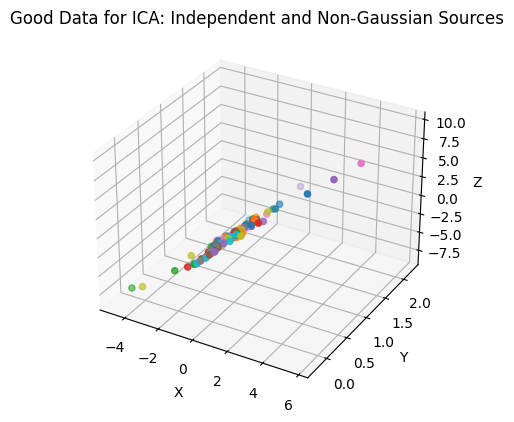

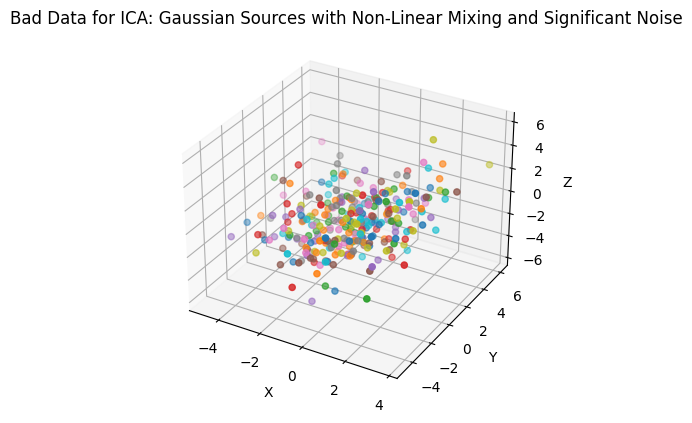

In [59]:
good_data = plot_and_return_good_data_ica()
bad_data = plot_and_return_bad_data_ica()

Kurtosis values for good Data: [9.95062517 2.79592048 9.98103592]
Negentropy values for good Data: [1.90340502 0.74917477 1.90638893]


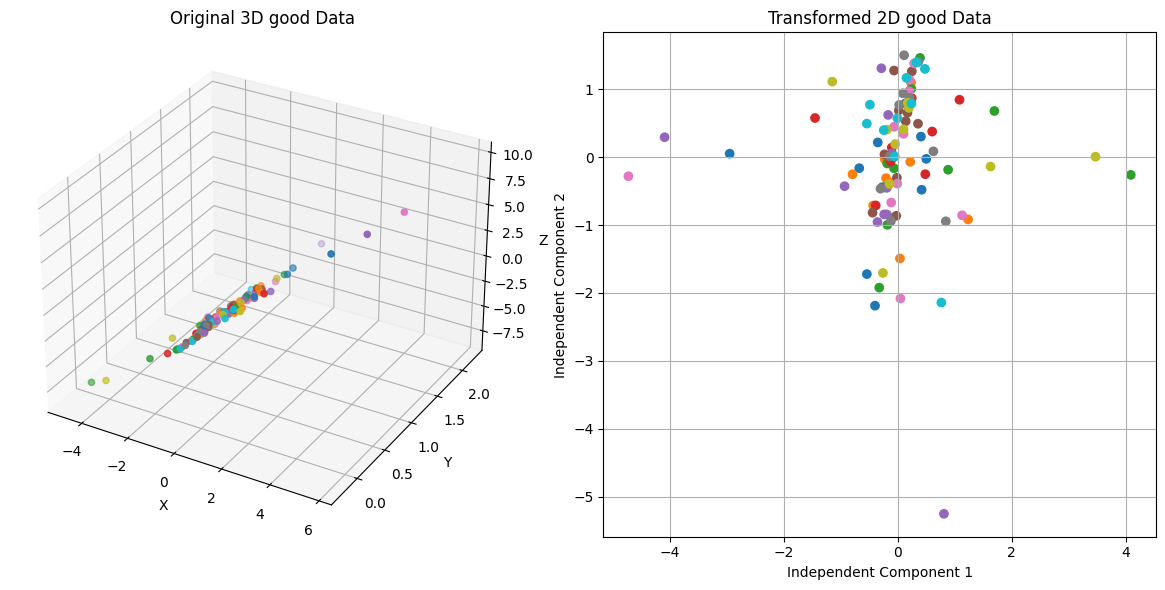

Kurtosis values for bad Data: [-0.25946507 -0.08543838  0.02004585]
Negentropy values for bad Data: [1.47410222e-02 1.61953352e-03 8.92889165e-05]


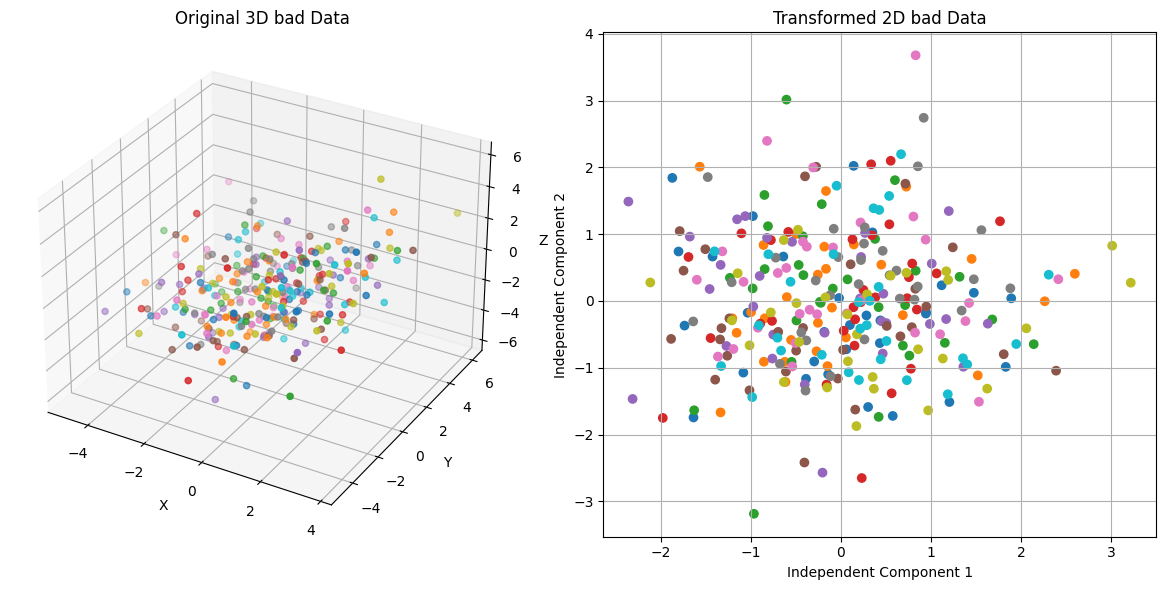

In [62]:
perform_ica_and_plot(good_data, 'good')
perform_ica_and_plot(bad_data, 'bad')

<p style="font-size:22px;"><b>Discussion

To create distinct datasets, we implemented principles outlined in the theoretical framework. The good dataset was generated by mixing three independent sources with non-Gaussian distributions using a random mixing matrix. This approach adheres to the assumptions of Independent Component Analysis (ICA), facilitating effective separation of sources.

In contrast, the bad dataset was created with sources that are highly correlated with Gaussian distribution and added significant Gaussian noise, thereby violating the assumptions of ICA and complicating source separation.

We evaluated the dimensionality reduction effectiveness using ICA by computing Kurtosis values for each independent component obtained from the transformed data matrix post-ICA. Kurtosis, calculated using the scipy.stats module, indicates the departure from Gaussianity in the components.

Additionally, we computed Negentropy values to further assess non-Gaussianity. Negentropy was estimated using a formula involving logarithms and Kurtosis values. Higher Negentropy values indicate a stronger departure from Gaussian distribution, which is desirable in ICA.

Upon visual inspection after dimensionality reduction, the good dataset retained its structure, while the bad dataset appeared sparse and lacked discernible patterns. Numerical evaluations supported these observations, showing higher Kurtosis and Negentropy values for components derived from the good dataset compared to the bad dataset.

In summary, while visual assessment alone may not fully gauge the success of ICA-based dimensionality reduction, quantitative metrics such as Kurtosis and Negentropy indicate that the reduction was more effective for the good dataset. These metrics reflect adherence to ICA assumptions and highlight the practical implications of dataset characteristics on dimensionality reduction outcomes.

<p style="font-size:35px;">Part 2 - Clustering

<p style="font-size:28px;"><b><u>K - means:

<p style="font-size:22px;"><b>summery:

K-means is a widely-used clustering algorithm that partitions data into clusters by iteratively updating cluster centroids. Beginning with random centroid initialization, the algorithm alternates between assigning each data point to the nearest centroid and updating the centroids based on the mean of the points assigned to each cluster. This process continues until convergence, typically defined by minimal centroid movement or a predetermined number of iterations. The algorithm aims to minimize the within-cluster sum of squared distances, ensuring tight clusters where data points are similar to their centroids. The main results of K-means include the final cluster centroids and the assignment of each data point to a cluster, along with the within-cluster sum of squared distances, providing insights into the compactness of the clusters. While efficient and scalable, K-means requires the number of clusters to be specified beforehand and is sensitive to the initial centroid positions, impacting the clustering outcome.<br>
The algorithem steps are:<br>
**Initialization**:Randomly select K data points from the dataset to serve as initial cluster centroids.<br>
**Assignment Step**:For each data point in the dataset, calculate the Euclidean distance to each centroid, Assign the data point to the cluster whose centroid is closest, forming K clusters.<br>
**Update Step**:Recalculate the centroids of the K clusters by taking the mean of the data points assigned to each cluster.<br>
**Convergence Check**:Check for convergence criteria, such as minimal centroid movement or a predetermined number of iterations.If the convergence criteria are not met, repeat steps 2 and 3 until convergence.<br>
**Result**:Once the algorithm converges, the final centroids represent the centers of the clusters. Each data point is assigned to the cluster corresponding to the nearest centroid, defining the cluster membership.


<p style="font-size:22px;"><b>underlying assumptions:

**Clusters are Spherical**: K-means assumes that clusters are spherical and have a roughly equal diameter in all directions. This means that the algorithm performs well when clusters are compact and have similar sizes.

**Clusters are Non-Overlapping**: K-means assumes that data points belong to one and only one cluster. It does not handle overlapping clusters well, and each data point is assigned exclusively to the nearest centroid.

**Similar Variance**: The algorithm assumes that the variance of the distribution of data points in each cluster is similar. If there are clusters with vastly different variances, K-means may produce suboptimal results.

**Linear Separability**: K-means implicitly assumes that clusters are linearly separable, meaning that data points from different clusters can be separated by linear decision boundaries. If clusters are not linearly separable, K-means may struggle to accurately partition the data.

**Uniform Cluster Density**: K-means assumes that the density of data points within each cluster is approximately uniform. If the cluster density varies significantly, with some clusters being denser than others, K-means may not perform well.

<p style="font-size:22px;"><b>according to the underlying assumptions K-means is expected to succeed when:


**Clusters are Well-Separated**: When clusters in the data are well-separated and have distinct boundaries, K-means can accurately assign data points to their respective clusters.

**Clusters are Spherical and Uniform**: K-means performs well when clusters are roughly spherical in shape and have similar variances. Additionally, if the density of data points within each cluster is approximately uniform, K-means is more likely to produce meaningful results.

**Linear Separability**: K-means is effective when clusters are linearly separable, allowing for clear boundaries between clusters that can be captured by linear decision boundaries.

**Similar Cluster Sizes**: K-means works best when clusters have similar sizes, as the algorithm aims to minimize the within-cluster sum of squared distances, assuming that clusters have comparable variances.

**Low Noise**: K-means is more robust to noise when the level of noise in the data is low, as noise can disrupt the clustering process and lead to suboptimal results.

<p style="font-size:22px;"><b>K-means is weeker in cases where:

**Non-Spherical Clusters**: When clusters in the data are non-spherical or have irregular shapes, K-means may struggle to accurately capture their geometry. The algorithm's assumption of spherical clusters can lead to suboptimal cluster assignments and poor performance.

**Unequal Variance**: If the variance of the distribution of data points within clusters varies significantly, K-means may produce clusters with unequal sizes or shapes. This can result in centroids being pulled towards regions with higher variance, leading to biased cluster assignments.

**Non-Linear Separability**: K-means is less effective when clusters are not linearly separable and require non-linear decision boundaries to separate them. In such cases, K-means may fail to capture complex patterns and produce clusters that do not accurately represent the underlying structure of the data.



**Variable Cluster Density**: When clusters have varying densities or contain outliers, K-means may struggle to identify clusters with different densities. The algorithm's uniform cluster density assumption can lead to suboptimal cluster assignments, especially in datasets with unevenly distributed data points.

**High Noise Levels**: K-means is sensitive to noise in the data, and high levels of noise can significantly impact its performance. Noise can introduce additional data points that do not belong to any cluster, leading to misinterpretation of the underlying structure and poor clustering results.

**Unknown cluster number**: K-means is redundent at its work if we are not aware of the number of clusters we want to find, a wrong number of clusters can lead to a very poor clustering of the data.

<p style="font-size:25px;"><b><u>coding section:

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings

In [81]:
def plot_and_return_good_data_for_k_means():
    # Generate data for the "good" dataset
    np.random.seed(0)
    # Define cluster centers
    centers = np.array([[1, 1], [5, 5], [9, 1]])
    # Generate data points around the centers
    data = np.vstack([np.random.normal(center, 0.5, size=(100, 2)) for center in centers])
    
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=UserWarning, module="IPython.core.pylabtools")

        
        plt.figure(figsize=(6, 6))
        plt.scatter(data[:, 0], data[:, 1], s=20, c='b', marker='o')
        plt.title('Good Data for K-means')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.grid(True)
        plt.show()
    
    return data

def plot_and_return_bad_data_for_k_means():
    # Generate data for the updated "bad" dataset with four clusters
    np.random.seed(0)
    # Define cluster centers with smaller separations
    centers = np.array([[1, 1], [8, 1], [1, 8], [8, 8]])
    # Generate data points around the centers with increased variance
    data = np.vstack([np.random.normal(center, 1.0 + 0.1 * i, size=(100, 2)) for i, center in enumerate(centers)])

    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=UserWarning, module="IPython.core.pylabtools")

        plt.figure(figsize=(6, 6))
        plt.scatter(data[:, 0], data[:, 1], s=20, c='b', marker='o')
        plt.title('Bad Data for K-means')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.grid(True)
        plt.show()
    
    return data

def run_k_means_and_plot(data, data_name):
    # Initialize and fit KMeans
    kmeans = KMeans(n_clusters=3, random_state=0)
    kmeans.fit(data)
    
    # Get cluster centers and labels
    cluster_centers = kmeans.cluster_centers_
    labels = kmeans.labels_
    
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=UserWarning, module="IPython.core.pylabtools")

        # Plot the data before clustering
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.scatter(data[:, 0], data[:, 1], s=20, c='b', marker='o')
        plt.title(f'{data_name} Data Before K-means Clustering')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.grid(True)
        
        # Plot the data after clustering
        plt.subplot(1, 2, 2)
        plt.scatter(data[:, 0], data[:, 1], s=20, c=labels, cmap='viridis', marker='o')
        plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='r', s=100, marker='x', label='Centroids')
        plt.title(f'{data_name} Data After K-means Clustering')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.grid(True)
        plt.legend()
        
        # Show the plot
        plt.tight_layout()
        plt.show()


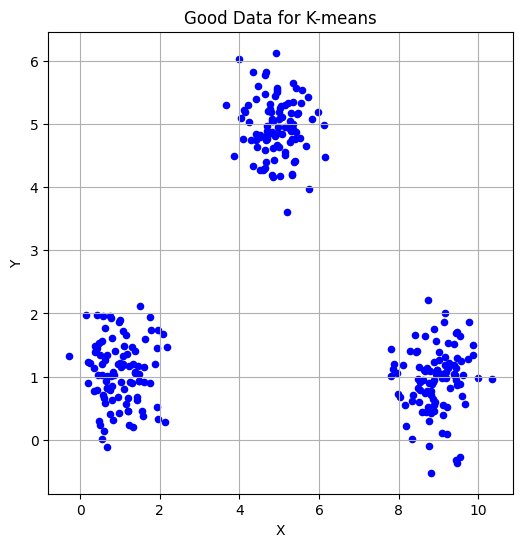

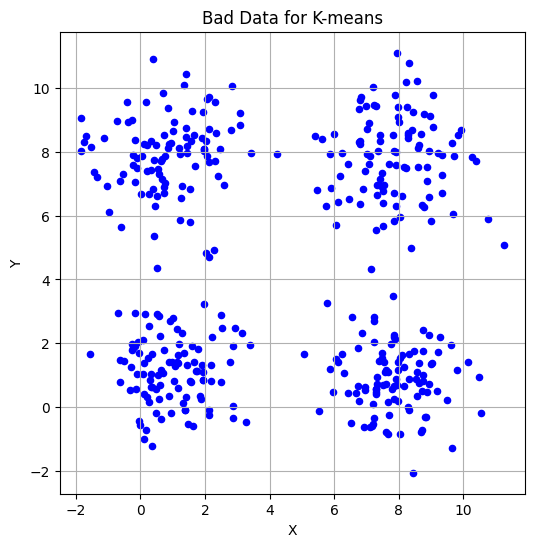

In [79]:
good_data = plot_and_return_good_data_for_k_means()
bad_data = plot_and_return_bad_data_for_k_means()

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


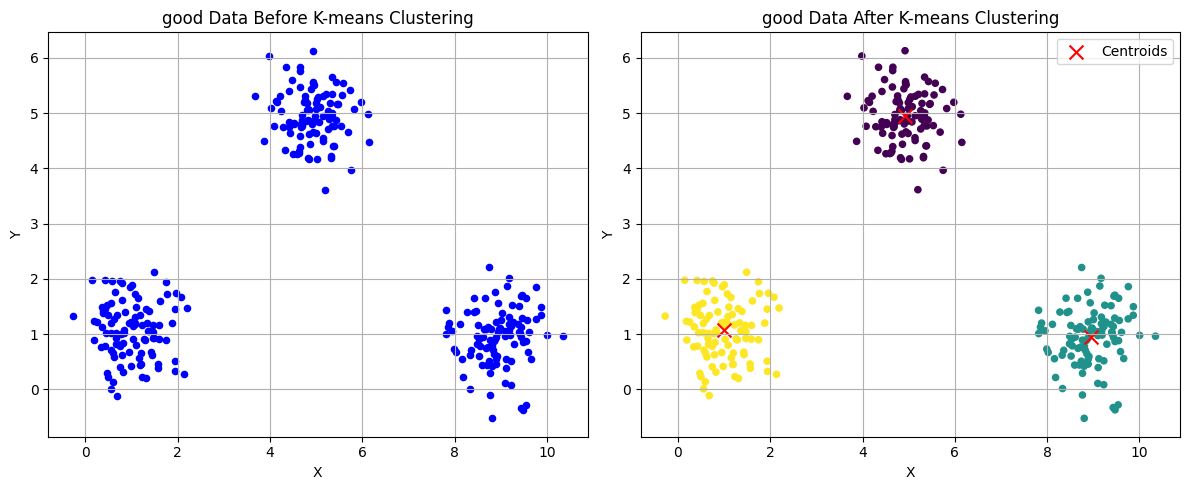

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


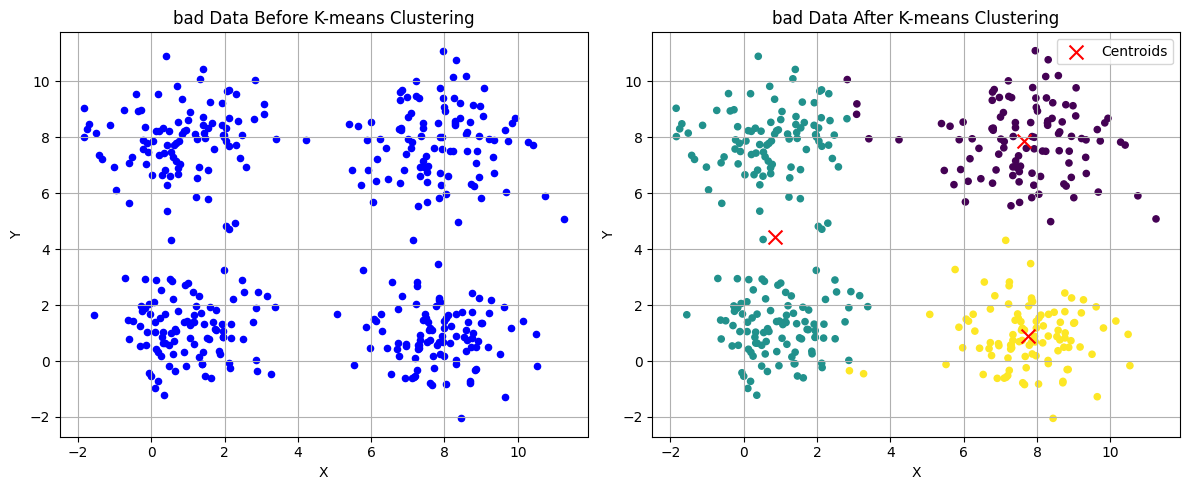

In [82]:
run_k_means_and_plot(good_data, 'good')
run_k_means_and_plot(bad_data, 'bad')

<p style="font-size:22px;"><b>Discussion

We created two datasets in accordance with theoretical principles and underlying assumptions. The good dataset comprises three clusters generated from normal distributions, each with distinct centers that are widely separated. In contrast, the bad dataset consists of four clusters with centers relatively close to each other, deliberately chosen to challenge the K-means algorithm.

Upon analysis, setting the hyperparameter K=3 allows us to observe clear clustering in the good dataset, with each cluster center accurately represented in the plots. Conversely, in the bad dataset, clusters are less distinguishable, and there is evident confusion where clusters are merged or incorrectly identified by the algorithm.

This observation highlights a primary weakness of K-means clustering: its sensitivity to the correct specification of the number of clusters K. When K is incorrectly chosen, K-means fails to appropriately partition the data, resulting in suboptimal clustering outcomes as depicted in the plots.

In conclusion, these findings underscore the importance of selecting an appropriate K value in K-means clustering to achieve meaningful and accurate cluster assignments, reflecting the practical implications of dataset characteristics on algorithm performance.

<p style="font-size:28px;"><b><u>DP-Means:

<p style="font-size:22px;"><b>summery:

The DP-Means algorithm, inspired by the Dirichlet Process, pioneers a dynamic clustering approach that intricately adjusts clusters in response to data attributes and a penalty parameter λ. Unlike the rigid constraints of K-Means, which necessitate a fixed number of clusters K, DP-Means iteratively adapts, fostering the creation of new clusters as data patterns dictate, thus accommodating datasets with uncertain or evolving cluster counts. At the heart of its adaptability, the penalty parameter λ orchestrates cluster sensitivity, delicately balancing the trade-off between cluster proliferation and data fidelity. Through its iterative refinement process and nuanced parameterization, DP-Means emerges as a sophisticated tool for capturing the intricate nuances inherent in real-world datasets, offering unparalleled flexibility in clustering analysis.<br>
The algorithm steps:<br>
**Initialization**:Set K=1. Initialize the first cluster mean μ1 as the mean of all data points.Assign initial labels to all data points.<br>
**Assignment Step**: For each data point xi, find the nearest cluster mean μk and assign the point to that cluster. Track the maximum distance if it exceeds λ.<br>
**Cluster Creation Step**:If the maximum distance exceeds λ, create a new cluster with the point that has the maximum distance.<br>
**Update Step**:Recalculate the means of all clusters based on current assignments.<br>
**Convergence Check**:Repeat assignment, cluster creation, and update steps until convergence. When the cluster assignments stabilize, meaning that data points remain consistently assigned to the same clusters across iterations

<p style="font-size:22px;"><b>underlying assumptions:

**Flexibility in Cluster Count**: DP-Means assumes that the number of clusters in the dataset is not known beforehand and may vary based on the data's characteristics. This assumption allows for dynamic adjustment of the cluster count during the clustering process.

**Dynamic Cluster Evolution**: DP-Means assumes that clusters evolve dynamically as the algorithm iterates through the data points. New clusters are created when the distance between a data point and its nearest cluster exceeds a certain threshold, reflecting the adaptability of the algorithm to the underlying data structure.

**Penalty Parameter Sensitivity**: DP-Means assumes that the penalty parameter λ plays a crucial role in controlling the sensitivity of cluster creation. Adjusting λ allows for fine-tuning the algorithm's behavior, influencing the balance between creating new clusters and maintaining data fidelity.

**Data Distribution Reflection**: DP-Means assumes that the resulting clustering solution should accurately reflect the underlying distribution of the data. By dynamically adjusting cluster assignments and creating new clusters as needed, DP-Means aims to capture the inherent structure of the dataset effectively.

<p style="font-size:22px;"><b>according to the underlying assumptions DP-means is expected to succeed when:


**Compact and Well-Separated Clusters**:The clusters should be compact (data points within a cluster are close to each other) and well-separated (distinct clusters are relatively far apart). This ensures that the threshold λ can effectively differentiate between forming new clusters and expanding existing ones.

**Independent and Finite Observations**:The data points are treated as independent observations with finite mean and variance. This ensures that cluster centroids and distances are meaningful and stable.

**Suitable Choice of Threshold λ**:The threshold parameter λ should be chosen appropriately to balance between creating new clusters and merging points into existing ones. This often requires domain knowledge or empirical tuning to match the specific dataset.

**Homogeneous Cluster Densities**:Similar to k-means, DP-Means assumes that clusters are roughly spherical and of similar densities. It works best when clusters are relatively uniform in size and shape.

**Limited Number of Outliers**:There should be few outliers or noise points in the dataset. DP-Means, like k-means, can be sensitive to outliers because they can influence the formation and updating of clusters.

<p style="font-size:22px;"><b>DP-means is weeker in cases where:

**Non-Spherical Clusters**:When clusters have irregular shapes or are not roughly spherical, DP-Means (like k-means) may not perform well, as it assumes that clusters are compact and roughly circular.

**Varying Cluster Densities**:If clusters have widely varying densities, DP-Means may struggle. The algorithm assumes clusters of similar density, and a single threshold λ may not be suitable for all clusters, leading to inappropriate merging or splitting of clusters.


**High-Dimensional Data**:In high-dimensional spaces, the concept of distance can become less meaningful due to the curse of dimensionality. This can make it difficult for DP-Means to accurately differentiate between clusters and correctly assign points.

**Presence of Outliers**:DP-Means is sensitive to outliers, which can disproportionately affect the formation and updating of clusters. Outliers may lead to the creation of unnecessary new clusters or distort existing clusters.

**Complex Cluster Structures**:For datasets with overlapping clusters or complex structures (such as clusters within clusters or elongated clusters), DP-Means might not perform well, as it assumes well-separated, compact clusters.

**Dependence on λ**:The performance of DP-Means heavily relies on the choice of the threshold parameter λ. Selecting an inappropriate λ can lead to over-clustering (too many small clusters) or under-clustering (too few large clusters).


**Noise and Non-Independent Features**:DP-Means assumes that features are independent and contribute equally to the clustering. In cases where features are correlated or there is significant noise in the data, the algorithm might not be effective.

**Dynamic Changes in Data**:If the data distribution changes over time, a static λ might not adapt well, leading to poor clustering results. DP-Means does not inherently handle dynamic data or streaming data well.

<p style="font-size:25px;"><b><u>coding section:

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans
import warnings


In [27]:
class DPMeans:
    def __init__(self, threshold=1.0):
        self.threshold = threshold
        self.centroids = None
        self.labels = None
        self.kmeans = None

    def fit(self, X):
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=FutureWarning, message=".*n_init.*")
            self.kmeans = KMeans(n_clusters=1, random_state=0).fit(X)
            self.centroids = self.kmeans.cluster_centers_
            self.labels = self.kmeans.labels_
            
            while True:
                old_centroids = self.centroids.copy()
                old_labels = self.labels.copy()
                
                for label in np.unique(old_labels):
                    cluster_points = X[old_labels == label]
                    if len(cluster_points) > 1:
                        kmeans_split = KMeans(n_clusters=2, random_state=0).fit(cluster_points)
                        centroid_diff = np.sum((kmeans_split.cluster_centers_ - cluster_points.mean(axis=0)) ** 2, axis=1)
                        if np.max(centroid_diff) > self.threshold:
                            self.labels[old_labels == label] = kmeans_split.labels_ + self.centroids.shape[0]
                            self.centroids = np.r_[self.centroids, kmeans_split.cluster_centers_]
                
                # Check convergence
                if old_centroids.shape == self.centroids.shape:
                    if np.allclose(old_centroids, self.centroids) and np.all(old_labels == self.labels):
                        break
            
            self.labels = self.labels.tolist()
            self.labels = [x+1 for x in self.labels]
        
    def fit_predict(self, X):
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=FutureWarning, message=".*n_init.*")
            self.fit(X)
            return self.labels

In [16]:
def plot_and_return_good_data_dp_means():
    # Create a dataset with well-separated, spherical clusters
    X_good, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.6, random_state=42)
    
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=UserWarning, module="IPython.core.pylabtools")
        # Plot the good dataset without labels
        plt.scatter(X_good[:, 0], X_good[:, 1], s=50, cmap='viridis')
        plt.title('Good Data for PDC-DP-Means')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.show()

        return X_good


def plot_and_return_bad_data_dp_means():
    # Generate badly-clustered data with overlapping clusters
    np.random.seed(0)
    cluster1 = np.random.normal(loc=[-3, -3], scale=1, size=(100, 2))
    cluster2 = np.random.normal(loc=[0, 3], scale=1, size=(100, 2))
    cluster3 = np.random.normal(loc=[3, -3], scale=1, size=(100, 2))
    data = np.concatenate((cluster1, cluster2, cluster3))

    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=UserWarning, module="IPython.core.pylabtools")
        # Plot the bad dataset without labels
        plt.scatter(data[:, 0], data[:, 1], s=50, cmap='viridis')
        plt.title('Bad Data for PDC-DP-Means')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.show()

    return data



def run_dp_means_and_plot(data, data_name, lam=1):
    # Initialize DP-Means
    dpmeans = DPMeans(threshold=lam)
    
    # Fit DP-Means clustering
    labels = dpmeans.fit_predict(data)

    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=UserWarning, module="IPython.core.pylabtools")

        plt.figure(figsize=(12, 6))
    
        # Plot original data
        plt.subplot(1, 2, 1)
        plt.scatter(data[:, 0], data[:, 1], s=50, cmap='viridis', c='gray', alpha=0.7)
        plt.title(f'Original {data_name}')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        
        # Plot clustered data
        plt.subplot(1, 2, 2)
        plt.scatter(data[:, 0], data[:, 1], s=50, cmap='viridis', c=labels, alpha=0.7)
        plt.title(f'DP-Means Clustering of {data_name}')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        
        plt.tight_layout()
        plt.show()
        
        # Show the plot
        plt.tight_layout()
        plt.show()
    

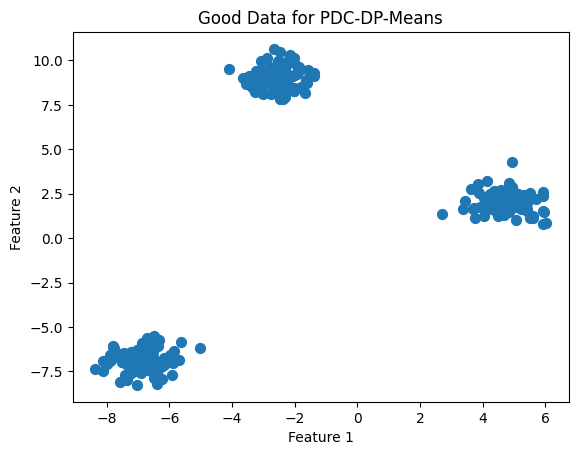

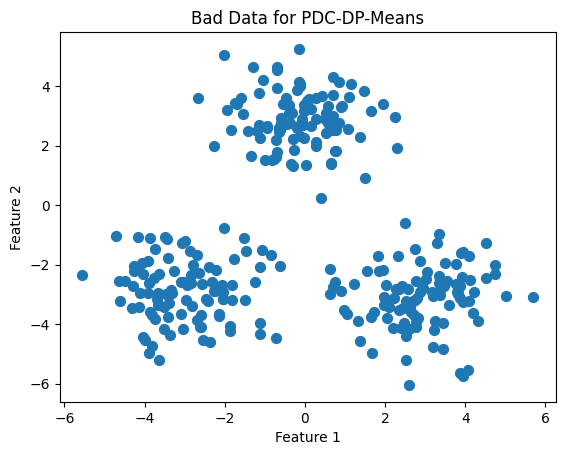

In [17]:
data_good = plot_and_return_good_data_dp_means()
data_bad = plot_and_return_bad_data_dp_means()

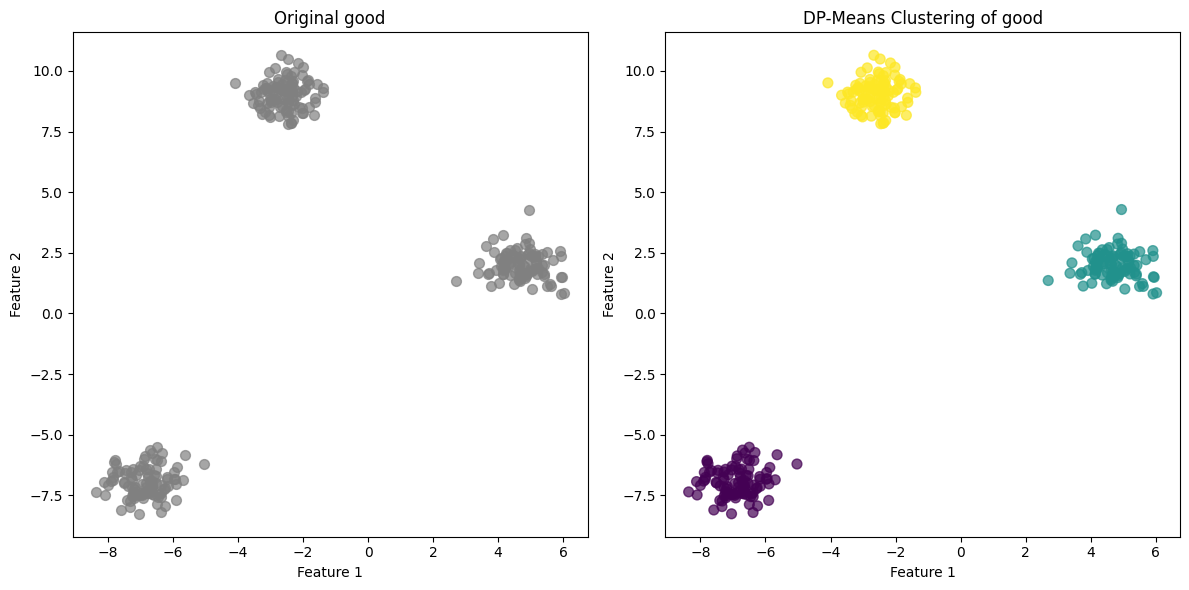

<Figure size 640x480 with 0 Axes>

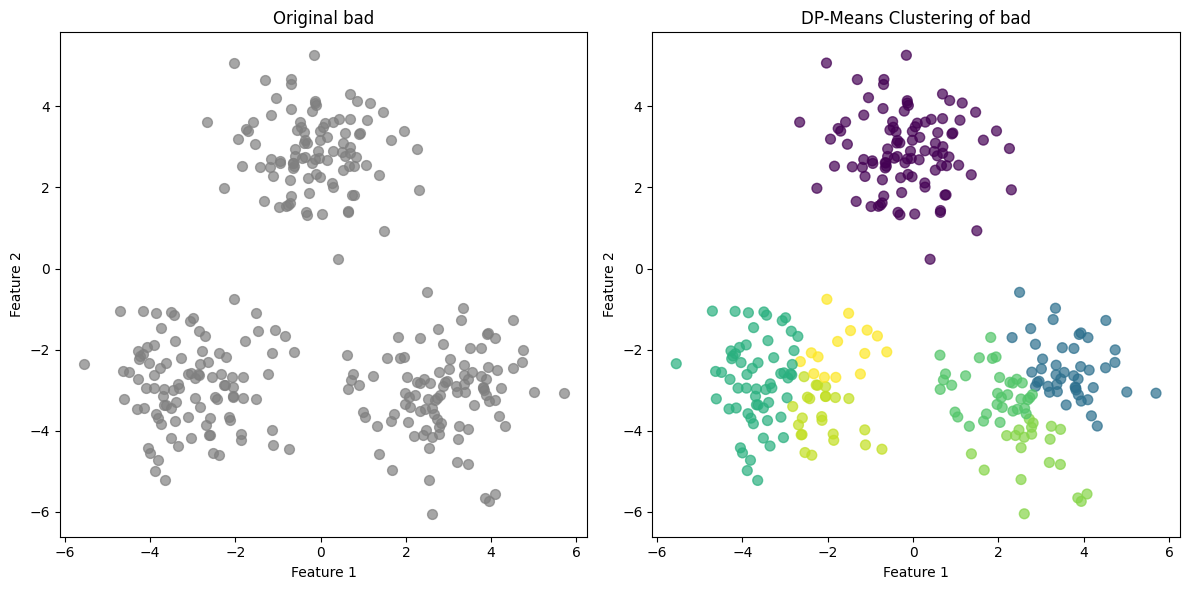

<Figure size 640x480 with 0 Axes>

In [28]:
run_dp_means_and_plot(data_good, "good", lam=1)
run_dp_means_and_plot(data_bad, "bad", lam=1)

<p style="font-size:22px;"><b>Discussion

We generated the data based on the underlying assumptions discussed previously. For the well-clustered data, we created densely populated clusters with centers that are significantly far apart. In contrast, for the poorly-clustered data, we created highly dispersed clusters. This approach exploited a key weakness of the DP-means algorithm, which is its sensitivity to the hyperparameter λ By setting λ to 1, the algorithm was able to correctly identify clusters in the well-clustered data due to their dense and distinct nature. However, in the case of the poorly-clustered data, the value of λ=1 was too small, leading to the formation of multiple clusters where there should not have been any. The results are evident in the corresponding plots.

All these outcomes align perfectly with the theoretical assumptions outlined in the earlier section. The plots visually confirm the expected behavior of the DP-means algorithm under varying conditions of data distribution and cluster density.

<p style="font-size:28px;"><b><u>Gaussian Mixture Model (GMM):

<p style="font-size:22px;"><b>summery:

The Gaussian Mixture Model (GMM) is a prominent probabilistic clustering method widely utilized in data analysis and machine learning. It operates under the assumption that the observed data points originate from a mixture of several Gaussian distributions, each representing a distinct cluster within the dataset. This assumption enables GMM to effectively capture complex data structures characterized by diverse densities and shapes, making it particularly adept at modeling datasets with overlapping clusters or non-linear boundaries. One of the distinguishing features of GMM is its ability to perform soft clustering, wherein each data point is associated with probabilities of belonging to each cluster. This probabilistic assignment allows for a more nuanced representation of the data, accommodating instances where data points may exhibit membership in multiple clusters simultaneously.By leveraging its probabilistic framework and soft clustering capabilities, GMM facilitates a deeper understanding of complex datasets, enabling practitioners to uncover hidden structures and patterns within the data. Its versatility and robustness make it a valuable tool across a wide range of applications in fields such as image analysis, natural language processing, and anomaly detection.>br
The algorithm:<br>
**Initialization**: The initialization phase of GMM involves setting the parameters governing the Gaussian distributions. This step can be executed randomly or leveraging initializations from other clustering algorithms like K-Means.<br>
**Expectation-Maximization (EM) Algorithm**:<br>
**Expectation (E-step)**: In this pivotal step, GMM computes the likelihood of each data point belonging to every cluster based on the prevailing parameter estimates.<br>
**Maximization (M-step)**: Following the E-step, GMM proceeds to refine its parameter estimates by maximizing the likelihood of the observed data given the current cluster assignments.<br>
**Convergence**: The EM algorithm iteratively alternates between the E-step and M-step until convergence, typically gauged by observing changes in the log-likelihood of the data or employing other convergence metrics.

<p style="font-size:22px;"><b>underlying assumptions:

**Normal Distribution**: The data within each cluster follows a Gaussian (normal) distribution.

**Independence**: Each data point is generated independently from others within the same cluster.



**Homoscedasticity**: Each cluster has the same covariance structure, implying that the variance of the data points is consistent across all dimensions.

**Mixture Model**: The observed data is assumed to be a mixture of multiple Gaussian distributions, each representing a distinct cluster or component within the dataset.



<p style="font-size:22px;"><b>according to the underlying assumptions GMM is expected to succeed when:


**Clusters Follow Gaussian Distribution**: The underlying data clusters can be reasonably approximated by Gaussian distributions.

**Clusters Have Similar Variance**: The variance of the data points within each cluster is relatively consistent across all dimensions.

**Data Points Are Generated Independently**: Data points within each cluster are generated independently of each other.

**Data Exhibits Soft Clustering**: The dataset contains overlapping or ambiguous regions where data points may belong to multiple clusters with varying degrees of membership probabilities.

<p style="font-size:22px;"><b>GMM is weeker in cases where:

**Non-Gaussian Distributions**: GMM assumes that each cluster follows a Gaussian distribution. If the underlying data distribution deviates significantly from Gaussianity, GMM may struggle to accurately model the data distribution, leading to suboptimal clustering results.

**High-Dimensional Data**: GMM tends to become less effective as the dimensionality of the data increases. In high-dimensional spaces, the number of parameters that need to be estimated grows rapidly, which can lead to overfitting and poor generalization performance.

**Irregular Cluster Shapes**: GMM assumes that clusters are spherical or elliptical in shape due to the isotropic covariance matrices. When clusters exhibit irregular shapes or complex geometries, GMM may struggle to capture the true structure of the data, resulting in less accurate clustering.



**Unequal Cluster Sizes**: If the clusters in the dataset have significantly different sizes, GMM may assign disproportionate weights to larger clusters, potentially overlooking smaller clusters or assigning them lower probabilities.

**Initialization Sensitivity**: GMM's performance can be sensitive to the initial parameters (e.g., mean, covariance, and mixing coefficients) used during the optimization process. Poor initialization may lead to convergence to suboptimal solutions or local optima.

**Computationally Intensive**: Estimating the parameters of GMM, especially in high-dimensional spaces or with large datasets, can be computationally demanding. As the number of clusters or dimensions increases, the computational complexity of GMM algorithms also grows, making them less scalable for big data scenarios.

**Vulnerable to Outliers**: GMM assumes that the data is generated from a mixture of Gaussian distributions, making it sensitive to outliers or anomalies that do not conform to this assumption. Outliers can distort the estimated parameters and affect the overall clustering performance.

<p style="font-size:25px;"><b><u>coding section:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
import warnings

In [42]:

def plot_and_return_good_data_gmm():
    # Create a dataset with well-separated, spherical clusters
    X_good, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.6, random_state=42)
    
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=UserWarning, module="IPython.core.pylabtools")
        # Plot the good dataset without labels
        plt.scatter(X_good[:, 0], X_good[:, 1], s=50, cmap='viridis')
        plt.title('Good Data for GMM')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.show()

        return X_good

def plot_and_return_bad_data_gmm():
    np.random.seed(42)
    
    # Define centers for each distribution
    center_uniform = [2, 2]
    center_exponential = [3, 3]
    center_lognormal = [4, -1]
    
    # Generate data around these centers
    X_uniform = np.random.uniform(low=-4, high=-1, size=(100, 2)) + center_uniform
    X_exponential = np.random.exponential(scale=1.5, size=(100, 2)) + center_exponential
    X_lognormal = np.random.lognormal(mean=0, sigma=0.5, size=(100, 2)) + center_lognormal
    
    # Stack the datasets
    X_bad = np.vstack([X_uniform, X_exponential, X_lognormal])
    
    # Plot the data
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=UserWarning, module="IPython.core.pylabtools")
        plt.scatter(X_bad[:, 0], X_bad[:, 1], s=50, cmap='viridis')
        plt.title('Bad Data for GMM')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.show()

    return X_bad


def run_gmm_and_plot(data, data_name):
    # Fit GMM to the data
    gmm = GaussianMixture(n_components=3, random_state=42)
    gmm.fit(data)
    labels = gmm.predict(data)
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=UserWarning, module="IPython.core.pylabtools")
        # Plot the original data
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.scatter(data[:, 0], data[:, 1], c='blue', alpha=0.5)
        plt.title(f"Original {data_name} Data")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")

        # Plot the clustered data
        plt.subplot(1, 2, 2)
        plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', alpha=0.5)
        plt.title(f"Clustered {data_name} Data (GMM)")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")

        plt.tight_layout()
        plt.show()

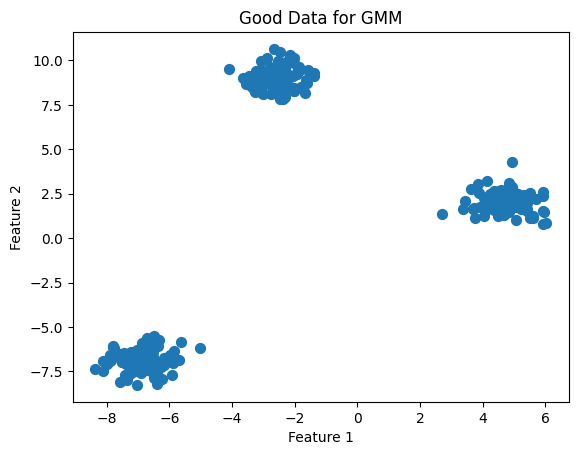

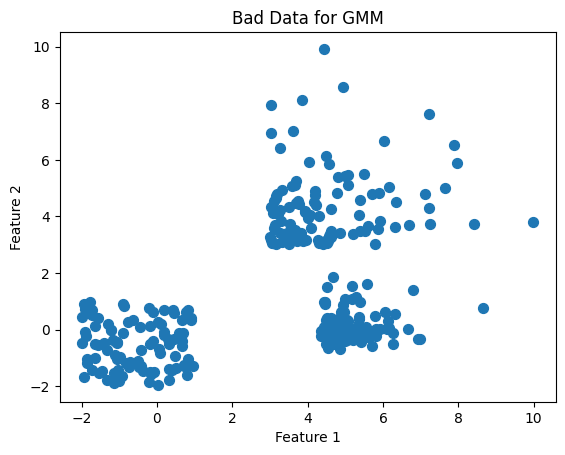

In [43]:
good_data = plot_and_return_good_data_gmm()
bad_data = plot_and_return_bad_data_gmm()

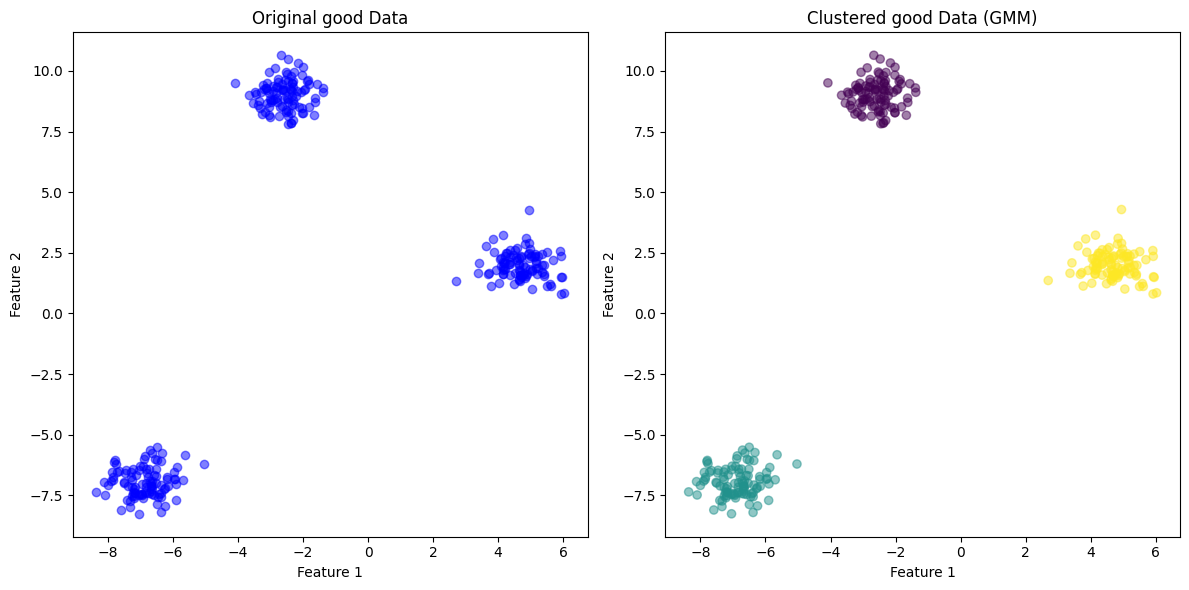

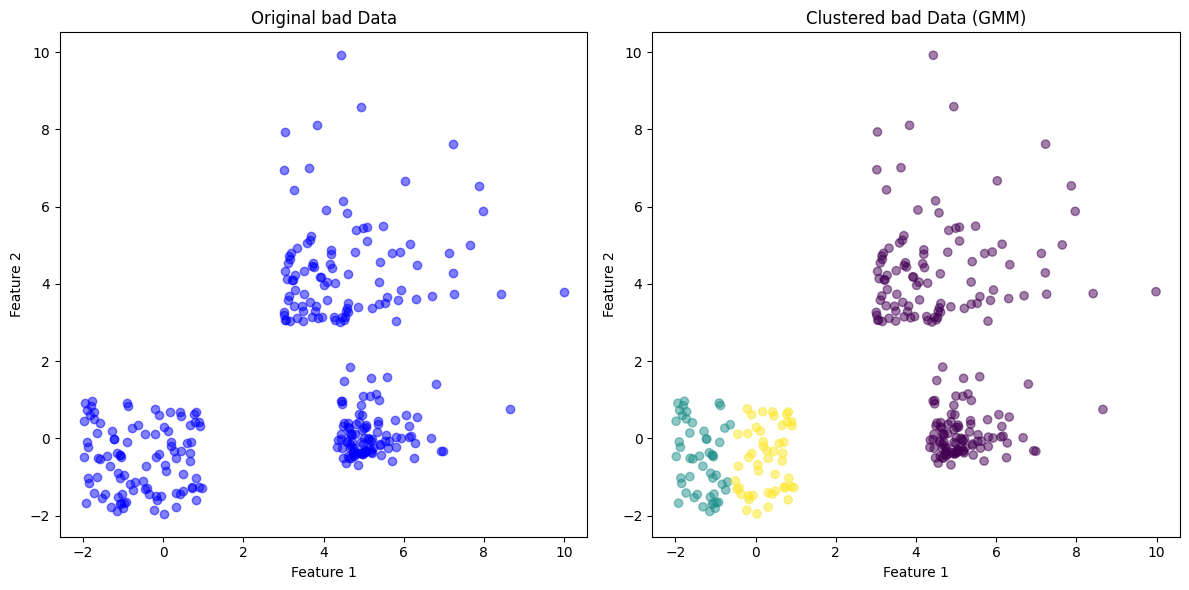

In [44]:
run_gmm_and_plot(good_data, 'good')
run_gmm_and_plot(bad_data, 'bad')

<p style="font-size:22px;"><b>Discussion


According to the underlying assumptions, we created two datasets to assess the performance of the Gaussian Mixture Model (GMM) clustering algorithm. In the good dataset, we generated three distinct clusters from Gaussian distributions, which enabled the algorithm to easily discern distribution patterns and accurately determine cluster memberships and centers. Conversely, in the bad dataset, we generated three clusters from non-Gaussian distributions, challenging the algorithm's ability to correctly identify and separate clusters.

Our results align closely with theoretical expectations. The GMM successfully identified and clustered the distinct Gaussian distributions in the good dataset, effectively determining cluster centers. However, in the bad dataset where distributions were non-Gaussian, the algorithm encountered difficulty distinguishing between clusters, resulting in less accurate clustering outcomes.

These findings underscore the critical role of dataset characteristics, particularly the distributional properties of data, in influencing the performance of clustering algorithms such as GMM. They highlight how departure from Gaussian distributions can complicate cluster identification and impact algorithmic effectiveness in practical applications.